## NO. 2

### 1 Part 1

In [1]:
import mysql.connector
import sqlalchemy as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
con = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = password
)

In [4]:
con

In [5]:
c = con.cursor(buffered=True)
query = 'USE world'
c.execute(query)

In [6]:
c

In [7]:
c.execute('SELECT * FROM country')

In [8]:
res = c.fetchall()

In [9]:
country = pd.DataFrame(res, columns = c.column_names)
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [10]:
country_answer = country.loc[:,['Name','Continent','Region','IndepYear','Population']]
country_answer

,Name,Continent,Region,IndepYear,Population
0,Aruba,North America,Caribbean,NaN,103000
1,Afghanistan,Asia,Southern and Central Asia,1919.0,22720000
2,Angola,Africa,Central Africa,1975.0,12878000
3,Anguilla,North America,Caribbean,NaN,8000
4,Albania,Europe,Southern Europe,1912.0,3401200
...,...,...,...,...,...
234,Yemen,Asia,Middle East,1918.0,18112000
235,Yugoslavia,Europe,Southern Europe,1918.0,10640000
236,South Africa,Africa,Southern Africa,1910.0,40377000
237,Zambia,Africa,Eastern Africa,1964.0,9169000


In [11]:
country_answer.sort_values(by=['Population']).head(10)

,Name,Continent,Region,IndepYear,Population
34,Bouvet Island,Antarctica,Antarctica,NaN,0
100,British Indian Ocean Territory,Africa,Eastern Africa,NaN,0
187,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,NaN,0
11,Antarctica,Antarctica,Antarctica,NaN,0
12,French Southern territories,Antarctica,Antarctica,NaN,0
221,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,NaN,0
93,Heard Island and McDonald Islands,Antarctica,Antarctica,NaN,0
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000


### 1 Part 2

In [12]:
c.execute('SELECT * FROM city')

In [13]:
res = c.fetchall()

In [14]:
city = pd.DataFrame(res, columns = c.column_names)
city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [15]:
city_mean = city.groupby('CountryCode').agg({'Population':'mean'}).sort_values(by=['Population'], ascending = False)
city_mean.head()

,Population
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0


In [16]:
city_mean['mean'] = city_mean['Population']

In [17]:
city_mean_answer = city_mean.drop(['Population'], axis = 1)
city_mean_answer.head(10)

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


### 1 Part 3

In [18]:
c.execute('SELECT * FROM countrylanguage')

In [19]:
res = c.fetchall()

In [20]:
cl = pd.DataFrame(res, columns = c.column_names)
cl.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [21]:
cl_lang = cl['Language'].value_counts().to_frame()
cl_lang.head()

,Language
English,60
Arabic,33
Spanish,28
French,25
German,19


In [22]:
cl_lang['count'] = cl_lang['Language']

In [23]:
cl_lang.drop(['Language'], axis = 1).head(10)

,count
English,60
Arabic,33
Spanish,28
French,25
German,19
Chinese,19
Russian,17
Italian,15
Creole English,14
Ukrainian,12


### 2 Part 1

In [24]:
c.execute('SELECT * FROM country')

In [25]:
res = c.fetchall()

In [26]:
country2 = pd.DataFrame(res, columns = c.column_names)
country2.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [27]:
cont_pop = country2.groupby('Continent').agg({'Population':'count'})
cont_pop

,Population
Continent,
Africa,58
Antarctica,5
Asia,51
Europe,46
North America,37
Oceania,28
South America,14


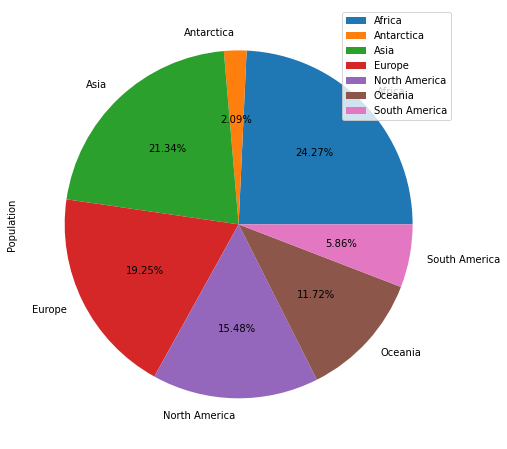

In [28]:
cont_pop.plot.pie(y='Population', figsize=(16, 8), autopct='%2.2f%%')
plt.show()

__Dari piechart di atas, penyumbang populasi terbanyak adalah benua Afrika dengan persentase sebesar 24.27%.__

### 2 Part 2

__Populasi dari benua Amerika adalah 15.48% + 5.86% = 21.34%__

### 3 Part 1

In [29]:
country2.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [30]:
africa = country2[country2['Continent'] == 'Africa']
africa.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
17,BDI,Burundi,Africa,Eastern Africa,27834.0,1962.0,6695000,46.2,903.0,982.0,Burundi/Uburundi,Republic,Pierre Buyoya,552.0,BI
19,BEN,Benin,Africa,Western Africa,112622.0,1960.0,6097000,50.2,2357.0,2141.0,Bénin,Republic,Mathieu Kérékou,187.0,BJ
20,BFA,Burkina Faso,Africa,Western Africa,274000.0,1960.0,11937000,46.7,2425.0,2201.0,Burkina Faso,Republic,Blaise Compaoré,549.0,BF
35,BWA,Botswana,Africa,Southern Africa,581730.0,1966.0,1622000,39.3,4834.0,4935.0,Botswana,Republic,Festus G. Mogae,204.0,BW


In [31]:
africa_pop = africa.groupby('Name').agg({'Population':'sum'}).sort_values(by=['Population'], ascending = False).reset_index()
africa_pop10 = africa_pop.head(10)
africa_pop10

,Name,Population
0,Nigeria,111506000
1,Egypt,68470000
2,Ethiopia,62565000
3,"Congo, The Democratic Republic of the",51654000
4,South Africa,40377000
5,Tanzania,33517000
6,Algeria,31471000
7,Kenya,30080000
8,Sudan,29490000
9,Morocco,28351000


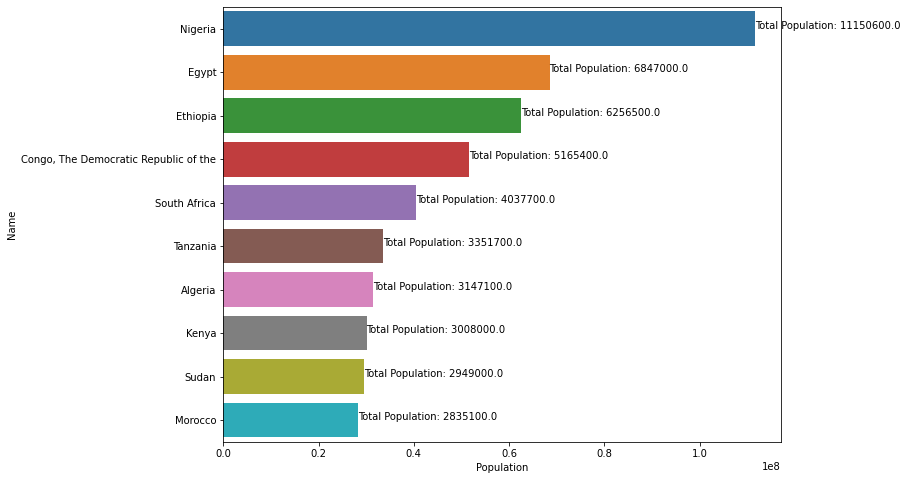

In [32]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = africa_pop10, x = 'Population', y = 'Name')

total = len(africa_pop10['Name'])
for p in ax.patches:
        percentage = 'Total Population: {:.1f}'.format(p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### 3 Part 2

__Nigeria adalah negara dengan populasi terbesar di Afrika__

### 3 Part 3

__Negara dengan populasi urutan 10 di Afrika adalah Morocco__ 

### 3 Part 4

__Negara Ethiopia dengan total populasi 62565000__

### 4 Part 1

In [33]:
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [34]:
country.LifeExpectancy = country['LifeExpectancy'].astype(float)

In [35]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 28.1+ KB


In [36]:
country.describe()

,IndepYear,Population,LifeExpectancy,Capital
count,192.000000,2.390000e+02,222.000000,232.000000
mean,1847.260417,2.543410e+07,66.486036,2071.306034
std,420.831370,1.093398e+08,11.519267,1184.095609
min,-1523.000000,0.000000e+00,37.200000,1.000000
25%,1906.750000,2.380000e+05,60.300000,915.750000
50%,1960.000000,3.869000e+06,70.150000,2449.500000
75%,1974.000000,1.493550e+07,75.500000,3065.250000
max,1994.000000,1.277558e+09,83.500000,4074.000000


In [37]:
iqr_le_asia = round(country.describe().loc['75%','LifeExpectancy'] - country.describe().loc['25%','LifeExpectancy'], 2)

In [38]:
print(f"IQR Life Expectancy benua Asia adalah {iqr_le_asia}")

IQR Life Expectancy benua Asia adalah 15.2


### 4 Part 2 dan 3

In [39]:
mean_le_asia = round((country.describe().loc['mean','LifeExpectancy']), 2)
median_le_asia = round((country.describe().loc['50%','LifeExpectancy']), 2)
std_le_asia = round((country.describe().loc['std','LifeExpectancy']), 2)
up_bound_le_asia = round((country.describe().loc['75%','LifeExpectancy'] + iqr_le_asia*1.5), 2)
low_bound_le_asia = round((country.describe().loc['25%','LifeExpectancy'] - iqr_le_asia*1.5), 2)

In [40]:
print(f"Mean life expectancy Asia = {mean_le_asia}")
print(f"Median life expectancy Asia = {median_le_asia}")
print(f"Standard deviation life expectancy Asia = {std_le_asia}")
print(f"Upper bound life expectancy Asia = {up_bound_le_asia}")
print(f"Lower bound life expectancy Asia = {low_bound_le_asia}")

Mean life expectancy Asia = 66.49
Median life expectancy Asia = 70.15
Standard deviation life expectancy Asia = 11.52
Upper bound life expectancy Asia = 98.3
Lower bound life expectancy Asia = 37.5


In [41]:
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


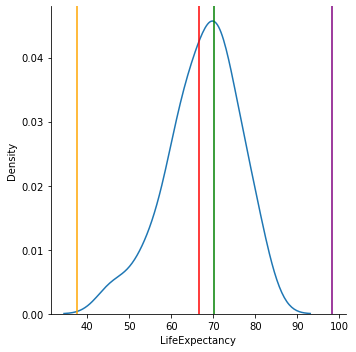

In [42]:
sns.displot(data = country[country['Continent'] == 'Asia'], x = 'LifeExpectancy', kind = 'kde')
plt.axvline(x = mean_le_asia, color = 'red')
plt.axvline(x = median_le_asia, color = 'green')
plt.axvline(x = up_bound_le_asia, color = 'purple')
plt.axvline(x = low_bound_le_asia, color = 'orange')
plt.show()

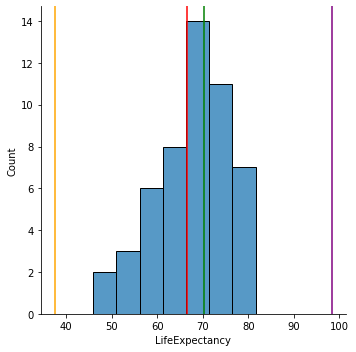

In [43]:
sns.displot(data = country[country['Continent'] == 'Asia'], x = 'LifeExpectancy')
plt.axvline(x = mean_le_asia, color = 'red')
plt.axvline(x = median_le_asia, color = 'green')
plt.axvline(x = up_bound_le_asia, color = 'purple')
plt.axvline(x = low_bound_le_asia, color = 'orange')
plt.show()

### 4 Part 4 dan 5

In [44]:
asia = country[country['Continent'] == 'Asia']

In [45]:
asia[(asia['LifeExpectancy'] > up_bound_le_asia) | (asia['LifeExpectancy'] < low_bound_le_asia)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2


__Menurut dataframe di atas, tidak ada Life Expectancy dari negara Asia yang berada di outliers.__

### 5 Part 1

In [46]:
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [47]:
country['GNP'] *= 1000000

In [48]:
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828000000.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976000000.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648000000.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63200000.0,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205000000.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


### 5 Part 2

In [49]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 28.1+ KB


In [50]:
country['GNP'] = country['GNP'].astype(float)

In [51]:
def percapita(column_name, gnp, population):
    country[column_name] = gnp/population

In [52]:
percapita('GNPperCapita', country['GNP'], country['Population'])

In [53]:
country['GNPperCapita'].head().to_frame()

,GNPperCapita
0,8038.834951
1,263.028169
2,516.229228
3,7900.000000
4,942.314477


### 6 Part 1 dan 2

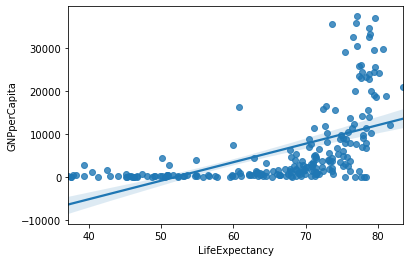

In [54]:
sns.regplot(data = country, x = 'LifeExpectancy', y = 'GNPperCapita')
plt.show()

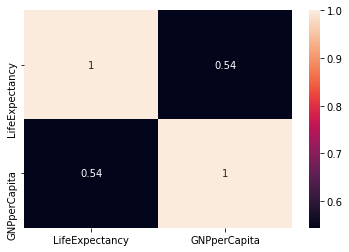

In [55]:
sns.heatmap(country[['LifeExpectancy','GNPperCapita']].corr(), annot=True)
plt.show()

__Berdasarkan regression plot dan heatmap dari korelasi Pearson di atas, LifeExpectancy dan GNPperCapita memiliki korelasi yang positif dengan nilai 0.54__

### 6 Part 3

In [56]:
gnp_max = country[country['GNP'] == country['GNP'].max()]
gnp_max

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
223,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8.510700e+12,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US,30574.765499


In [57]:
gnp_max[['Name','Continent','GNP']]

,Name,Continent,GNP
223,United States,North America,8.510700e+12


### 7 Part 1

In [58]:
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477


In [59]:
europe = country[country['Continent'] == 'Europe']
europe.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
5,AND,Andorra,Europe,Southern Europe,468.0,1278.0,78000,83.5,1.630000e+09,None,Andorra,Parliamentary Coprincipality,,55.0,AD,20897.435897
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,2.118600e+11,206025.0,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,26182.060852
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,2.497040e+11,243948.0,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,24387.537845
22,BGR,Bulgaria,Europe,Eastern Europe,110994.0,1908.0,8190900,70.9,1.217800e+10,10169.0,Balgarija,Republic,Petar Stojanov,539.0,BG,1486.771905


### 7 Part 2

In [60]:
europe['GNPOld'] = europe['GNPOld'].astype(float)

<ipython-input-60-744de5ff4652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe['GNPOld'] = europe['GNPOld'].astype(float)


In [61]:
europe.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
5,AND,Andorra,Europe,Southern Europe,468.0,1278.0,78000,83.5,1.630000e+09,NaN,Andorra,Parliamentary Coprincipality,,55.0,AD,20897.435897
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,2.118600e+11,206025.0,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,26182.060852
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,2.497040e+11,243948.0,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,24387.537845
22,BGR,Bulgaria,Europe,Eastern Europe,110994.0,1908.0,8190900,70.9,1.217800e+10,10169.0,Balgarija,Republic,Petar Stojanov,539.0,BG,1486.771905


In [62]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 4 to 235
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            46 non-null     object 
 1   Name            46 non-null     object 
 2   Continent       46 non-null     object 
 3   Region          46 non-null     object 
 4   SurfaceArea     46 non-null     object 
 5   IndepYear       43 non-null     float64
 6   Population      46 non-null     int64  
 7   LifeExpectancy  44 non-null     float64
 8   GNP             46 non-null     float64
 9   GNPOld          36 non-null     float64
 10  LocalName       46 non-null     object 
 11  GovernmentForm  46 non-null     object 
 12  HeadOfState     45 non-null     object 
 13  Capital         46 non-null     float64
 14  Code2           46 non-null     object 
 15  GNPperCapita    46 non-null     float64
dtypes: float64(6), int64(1), object(9)
memory usage: 6.1+ KB


In [63]:
europe = europe[pd.notnull(europe['GNPOld'])]

In [64]:
europe = europe[pd.notnull(europe['GNP'])]

In [65]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 4 to 220
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            36 non-null     object 
 1   Name            36 non-null     object 
 2   Continent       36 non-null     object 
 3   Region          36 non-null     object 
 4   SurfaceArea     36 non-null     object 
 5   IndepYear       36 non-null     float64
 6   Population      36 non-null     int64  
 7   LifeExpectancy  36 non-null     float64
 8   GNP             36 non-null     float64
 9   GNPOld          36 non-null     float64
 10  LocalName       36 non-null     object 
 11  GovernmentForm  36 non-null     object 
 12  HeadOfState     36 non-null     object 
 13  Capital         36 non-null     float64
 14  Code2           36 non-null     object 
 15  GNPperCapita    36 non-null     float64
dtypes: float64(6), int64(1), object(9)
memory usage: 4.8+ KB


### 7 Part 3

In [66]:
europe['GNPOld'] *= 1000000

In [67]:
europe.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2.500000e+09,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,2.118600e+11,2.060250e+11,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,26182.060852
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,2.497040e+11,2.439480e+11,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,24387.537845
22,BGR,Bulgaria,Europe,Eastern Europe,110994.0,1908.0,8190900,70.9,1.217800e+10,1.016900e+10,Balgarija,Republic,Petar Stojanov,539.0,BG,1486.771905
39,CHE,Switzerland,Europe,Western Europe,41284.0,1499.0,7160400,79.6,2.644780e+11,2.560920e+11,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH,36936.204681


__H0: Tidak terdapat perbedaan atau pertambahan signifikan dari GNPOld ke GNP (GNPOld = GNP)__

__H1: Terdapat penambahan signifikan dari GNPOld ke GNP (GNPOld > GNP)__

In [68]:
import scipy.stats

In [69]:
tstats, pvalue = scipy.stats.ttest_ind(europe['GNP'], europe['GNPOld'])

In [70]:
tstats

0.019698393799512267

In [71]:
pvalue

0.984340013218504

In [72]:
## karena one-tailed t-test
alpha = 0.05 * 2

In [74]:
if pvalue < alpha:
    print("Null hypothesis berhasil ditolak dan menerima alternate hypothesisNull hypothesis tidak berhasil ditolak")
else:
    print("Null hypothesis tidak berhasil ditolak")

Null hypothesis tidak berhasil ditolak


__Karena H0 tidak berhasil ditolak, maka tidak terdapat bukti statistik yang cukup untuk membuktikan bahwa terdapat peningkatan signifikan dari GNPOld ke GNP__